<a href="https://colab.research.google.com/github/Yukkitsune/TBank-Analytics/blob/main/Probability%20theory%20and%20mathematical%20statistics/homework1_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ссылка на датасет:
https://drive.google.com/file/d/1XB_yieTBz0aoJLbmT51w7MiHbk3J0rRo/view?usp=sharing

In [56]:
!gdown 1XB_yieTBz0aoJLbmT51w7MiHbk3J0rRo

Downloading...
From: https://drive.google.com/uc?id=1XB_yieTBz0aoJLbmT51w7MiHbk3J0rRo
To: /content/spam_classes.csv
100% 1.13k/1.13k [00:00<00:00, 4.60MB/s]


In [57]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import binom, poisson, expon, norm, uniform, weibull_min, mode

___

## Задание 1: Визуальный анализ распределений случайных величин
### Постройте гистограмы для следующих распределений:
1. Равномерное с параметрами (0, 1)
2. Нормальное распределение с параметрами mu=0, sigma=1
3. Распределение Вейбулла с x = 10, c = 7 (взять функцию weibull_min из scipy.stats)

___

**Равномерное с параметрами (0, 1) через numpy**

<Axes: ylabel='Count'>

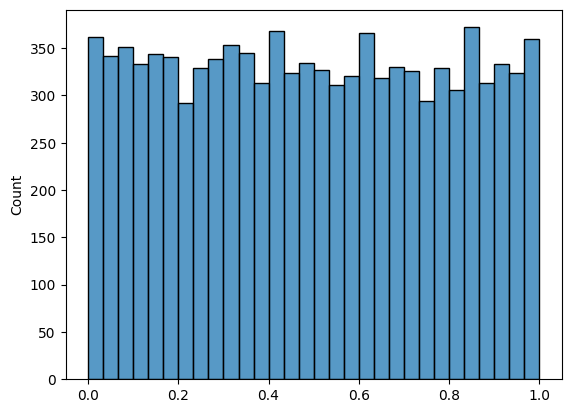

In [58]:
low, high = 0, 1
uniform_dist = np.random.uniform(low=low, high=high, size=10000)
sns.histplot(uniform_dist, bins=30)

**Нормальное распределение с параметрами mu=0, sigma=1 через scipy**

<Axes: ylabel='Count'>

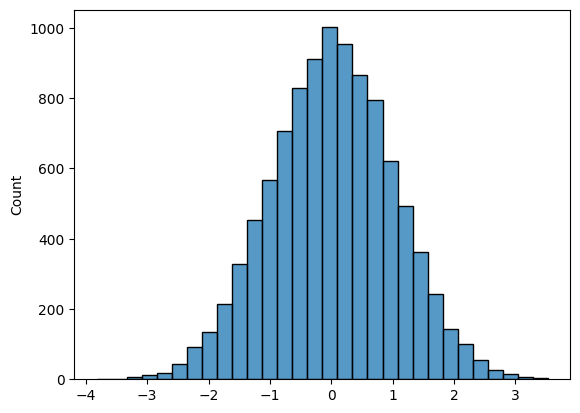

In [59]:
mu, sigma = 0, 1
norm_dist = norm(loc=mu, scale=sigma).rvs(10000)
sns.histplot(norm_dist, bins=30)

**Распределение Вейбулла с x = 10, c = 7 (взять функцию weibull_min из scipy.stats)**

<Axes: ylabel='Count'>

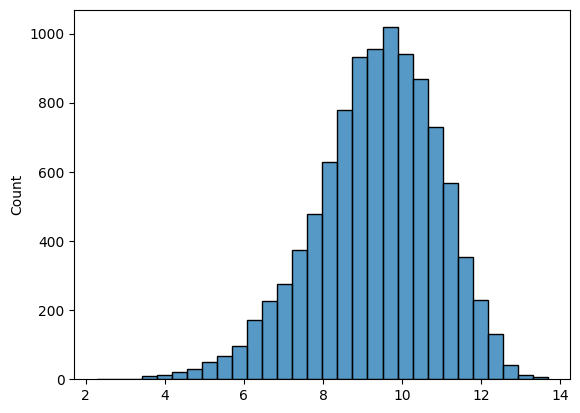

In [60]:
c = 7
x = 10
weibull_dist = weibull_min(c=c, scale=x).rvs(10000)
sns.histplot(weibull_dist, bins=30)

## Задание 2: Свойства нормального распределения
### Случайная величина имеет нормальное распределение с параметрами mu = 10, sigma = 2.
1. Дайте текстовый ответ, что такое "Правило трёх сигм"?
2. Рассчитайте вероятность того, что случайная величина примет значение больше 16. (Поможет метод cdf)
3. Какому значению случайной величины соответствует 5-й персентиль функции распределения? (Поможет метод ppf)
4. Рассчитайте точную оценку вероятности того, что случайная величина из нормального распределения с такими параметрами не отклонится от математического ожидания больше чем на 2 сигмы. А на 1 сигму?

___

**Дайте текстовый ответ, что такое "Правило трёх сигм"?**

Это подход оценки отклонения случайной величины от среднего значения. От пика нормального распределения, то есть среднего значения (обозначим его за m), значения величины будут находиться в пределах трёх сигм.
В пределах (m - sigma, m + sigma) находится примерно 68% значений переменной.
В (m - 2 sigma, m + 2 sigma) примерно 95% значений.
В (m - 3 sigma, m + 3 sigma) примерно 99% значений.
Это правило работает только в случае похожего на нормальное распределения данных.

Случайная величина имеет нормальное распределение с параметрами mu = 10, sigma = 2.

**Рассчитайте вероятность того, что случайная величина примет значение больше 16. (Поможет метод cdf)**

In [61]:
mu, sigma = 10, 2
threshold = 16
prob_greater_threshold = 1 - norm.cdf(threshold, loc=mu, scale=sigma)
prob_greater_threshold

np.float64(0.0013498980316301035)

**Какому значению случайной величины соответствует 5-й персентиль функции распределения? (Поможет метод ppf)**

<Axes: ylabel='Count'>

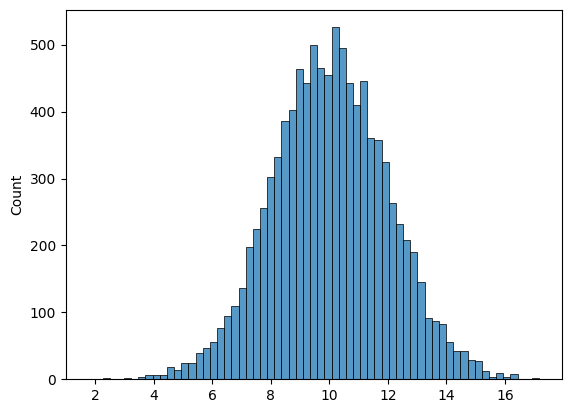

In [62]:
mu, sigma = 10, 2
percent_norm = norm(loc=mu, scale= sigma).rvs(10000)
sns.histplot(percent_norm)


In [63]:
percentile = 0.05
percentile_value = norm.ppf(percentile, loc=mu, scale=sigma)
percentile_value

np.float64(6.710292746097054)

**Рассчитайте точную оценку вероятности того, что случайная величина из нормального распределения с такими параметрами не отклонится от математического ожидания больше чем на 2 сигмы. А на 1 сигму?**

In [64]:
mu, sigma = 10, 2
norm_dist = norm(loc=mu, scale=sigma)
# Рассчитаем через разность двух cdf, так как двухаргументная версия из документации почему-то не работает https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.Normal.cdf.html
prob_inside_2sigma = norm_dist.cdf(mu + 2*sigma) - norm_dist.cdf(mu - 2*sigma)
prob_inside_1sigma = norm_dist.cdf(mu + sigma) - norm_dist.cdf(mu - sigma)

print(f'P({mu - sigma} <= X < {mu + sigma}) = {prob_inside_1sigma} --- probability inside 1 sigma interval')
print(f'P({mu - 2*sigma} <= X < {mu + 2*sigma}) = {prob_inside_2sigma} --- probability inside 2 sigma interval')

P(8 <= X < 12) = 0.6826894921370859 --- probability inside 1 sigma interval
P(6 <= X < 14) = 0.9544997361036416 --- probability inside 2 sigma interval


## Задание 3: Зависимые случайные величины
### Что такое зависимые случайные величины, дайте развёрнутый текстовый ответ?

Пусть имеется случайная величина ${X}$ из равномерного распределения с параметрами (0, 1). Вторая случайная величина, ${Y}$, получена путём возведения первой в квадрат и прибавления единицы. Будут ли эти случайные величины зависимы? С помощью какой статистики можно оценить "меру зависимости" двух этих случайных величин?

Рассмотрим случайную величину ${X + Y}$. Напишите формулы, по которым считаются математическое ожидание и дисперсия для суммы зависимых случаных величин. Рассчитайте математическое ожидание и диспресию случайной величины ${X + Y}$, сгенерировав распределения ${X}$ и ${Y}$. Достаточно будет 1000 наблюдений.

___

**Что такое зависимые случайные величины, дайте развёрнутый текстовый ответ?**

Случайные величины X и Y являются зависимыми, если значение одной из величин влияет на значение другой. В отличие от независимых величин, где вероятность происхождения двух событий равна произведению их вероятностей P(XY) = P(X) * P(Y), в контексте зависимых величин, это не работает, то есть P(XY) != P(X) * P(Y). Для зависимых величин ковариация и, соответственно, корреляция отличны от нуля.

**Пусть имеется случайная величина  X  из равномерного распределения с параметрами (0, 1). Вторая случайная величина,  Y , получена путём возведения первой в квадрат и прибавления единицы. Будут ли эти случайные величины зависимы? С помощью какой статистики можно оценить "меру зависимости" двух этих случайных величин?**

Величины X и Y будут зависимы из-за того, что по условию дана функциональная зависимость получения Y от X путём возведения X в квадрат и прибавления единицы, то есть Y = X^2 + 1. Меру зависимости Y от X можно оценить, посчитав ковариацию или корреляцию.

**Рассмотрим случайную величину  X+Y . Напишите формулы, по которым считаются математическое ожидание и дисперсия для суммы зависимых случаных величин. Рассчитайте математическое ожидание и диспресию случайной величины  X+Y , сгенерировав распределения  X  и  Y . Достаточно будет 1000 наблюдений.**

Случайная величина: (X+Y)

Математическое ожидание: E(X+Y) = E(X) + E(Y)


Дисперсия: Var(X+Y) = Var(X) + Var(Y) + 2Cov(X,Y)

In [65]:
np.random.seed(42)

# Зависимые случайные величины и их сумма
X = np.random.uniform(0, 1, 1000)
Y = X**2 + 1
Z = X + Y

# Проверим формулу матожидания
E_X = np.mean(X)
E_Y = np.mean(Y)
E_Z = np.mean(Z)
E_Z_theory = E_X + E_Y
print('Матожидание')
print(f'E(X) = {E_X}')
print(f'E(Y) = {E_Y}')
print(f'E(X+Y) = {E_Z} -- как матожидание величины от суммы величин')
print(f'E(X+Y) = {E_Z_theory} -- как матожидание через формулу')
print(f'Разница -- {abs(E_Z_theory - E_Z)}')
print('-'*20)

#Расчет дисперсии и ковариации
Var_X = np.var(X, ddof = 1)
Var_Y = np.var(Y, ddof = 1)
Var_Z = np.var(Z, ddof = 1)
Cov_XY = np.cov(X, Y)[0,1]
Var_Z_theory = Var_X + Var_Y + 2*Cov_XY
print('Дисперсия')
print(f'Var(X) = {Var_X}')
print(f'Var(Y) = {Var_Y}')
print(f'Var(X+Y) = {Var_Z} -- как дисперсия величины от суммы величин')
print(f'Var(X+Y) = {Var_Z_theory} -- как дисперсия через формулу')
print(f'Разница -- {abs(Var_Z_theory - Var_Z)}')

Матожидание
E(X) = 0.4902565533201336
E(Y) = 1.325610382080728
E(X+Y) = 1.8158669354008614 -- как матожидание величины от суммы величин
E(X+Y) = 1.8158669354008614 -- как матожидание через формулу
Разница -- 0.0
--------------------
Дисперсия
Var(X) = 0.08534423824563644
Var(Y) = 0.08955517903542184
Var(X+Y) = 0.3441947627789386 -- как дисперсия величины от суммы величин
Var(X+Y) = 0.3441947627789386 -- как дисперсия через формулу
Разница -- 0.0


## Задание 4: Детектор спама

В таблице `spam_classes.csv` представлены результаты классификации 100 писем, полученных от пользователей. В столбце `is_spam` указано, является ли письмо спамом, а в столбце `marked_spam` — результат работы классификатора.

Задача:
1. Оцените с помощью формулы Байеса вероятность того, что письмо, классифицированное как спам, действительно является спамом. Вероятности, необходимые для применения формулы, рассчитайте по данным в DataFrame
2. С помощью DataFrame посчитайте фактическую вероятность того, что письмо, классифицированное как спам, действительно является спамом.


___

In [66]:
df = pd.read_csv('spam_classes.csv')
df.head()

,is_spam,marked_spam
0,True,True
1,False,True
2,False,False
3,False,False
4,True,False


**Оцените с помощью формулы Байеса вероятность того, что письмо, классифицированное как спам, действительно является спамом. Вероятности, необходимые для применения формулы, рассчитайте по данным в DataFrame**

Пусть спам = S, классифицировано как спам = M

Формула Байеса:

P(S|M) = P(M|S) * P(S) / P(M)


In [67]:
prob_m_and_s = len(df[(df['is_spam'] == True) & (df['marked_spam'] == True)]) / len(df)
prob_s = len(df[df['is_spam'] == True]) / len(df)
prob_m_cond_s = prob_m_and_s / prob_s
prob_m = len(df[df['marked_spam'] == True]) / len(df)
prob_sm = prob_m_cond_s * prob_s / prob_m
print(f'P(S|M) = {prob_sm} -- по формуле Байеса')

P(S|M) = 0.9333333333333332 -- по формуле Байеса


**С помощью DataFrame посчитайте фактическую вероятность того, что письмо, классифицированное как спам, действительно является спамом.**

Формула условной вероятности:

P(S|M) = P(SM) / P(M)

In [68]:
prob_m_and_s = len(df[(df['is_spam'] == True) & (df['marked_spam'] == True)]) / len(df)
prob_m = len(df[df['marked_spam'] == True]) / len(df)
prob_sm_direct = prob_m_and_s / prob_m
print(f'P(S|M) = {prob_sm_direct} -- фактическая вероятность')

P(S|M) = 0.9333333333333332 -- фактическая вероятность


## Задание 5: Расчет вероятностей исходя из разных распределений

Перед вами ниже находится несколько задач на расчет вероятностей. Ваша задача: определить с помощью какого распределения можно решить задачу и вычислить вероятность с помощью функций плотности распределения из `scipy`.

1. Баскетболист совершает 20 штрафных бросков за игру. Вероятность успеха каждого броска составляет 70%. Какова вероятность того, что игрок совершит не менее 15 бросков?
2. Время между прибытиями автобусов составляет в среднем 10 минут. Какова вероятность того, что автобус прибудет в течение 5 минут?
3. Средний рост взрослого человека составляет 170 см, дисперсия составляем - 100 см. Какова вероятность того, что случайно выбранный взрослый человек имеет рост от 160 до 180 см?
4. В большом лесу среднее количество медведей составляет 2 особи на квадратный километр. Какова вероятность встретить 5 и более медведей на квадратном километре?

___

**Баскетболист совершает 20 штрафных бросков за игру. Вероятность успеха каждого броска составляет 70%. Какова вероятность того, что игрок совершит не менее 15 бросков?**

В этой задаче представлено биномиальное распределение, так как испытания независимы, есть ровно 2 исхода - успех или неудача, число испытаний фиксировано, вероятность успеха постоянна.

In [69]:
shots = 20
p = 0.7
success = 15
# В документации, кроме метода cdf, увидел sf = 1 - cdf, поэтому решил, что здесь будет рациональнее использовать его
# !! Оставьте комментарий, что из них использовать практичнее и яснее !!
prob_shots = binom.sf(k = success - 1, n = shots, p = p)
prob_shots

np.float64(0.41637082944748116)

**Время между прибытиями автобусов составляет в среднем 10 минут. Какова вероятность того, что автобус прибудет в течение 5 минут?**

В этой задаче экспоненциальное распределение, которое отвечает на вопрос, через какой интервал времени произойдет следующий успех. События происходят независимо с постоянной средней скоростью.


In [70]:
lambda_const = 10
time = 5
prob_in_time = expon.cdf(time, scale=lambda_const)
prob_in_time

np.float64(0.3934693402873666)

**Средний рост взрослого человека составляет 170 см, дисперсия составляем - 100 см. Какова вероятность того, что случайно выбранный взрослый человек имеет рост от 160 до 180 см?**

Здесь представлено нормальное распределение. Рост - величина непрерывная, симметрична вокруг среднего значения и, как было разобрано на лекции, на неё действует ЦПТ

In [71]:
mu = 170
sigma = np.sqrt(100)
height_dist = norm(loc=mu, scale = sigma)
mn, mx = 160, 180
prob_mn_to_mx = height_dist.cdf(mx) - height_dist.cdf(mn)
prob_mn_to_mx

np.float64(0.6826894921370859)

**В большом лесу среднее количество медведей составляет 2 особи на квадратный километр. Какова вероятность встретить 5 и более медведей на квадратном километре?**

В этой задаче распределение Пуассона, так как они редки, случайны, независимы.

In [72]:
mu = 2
cnt = 5

# Здесь ещё раз использовал sf вместо cdf
prob_cnt_more = poisson.sf(cnt - 1, mu)
prob_cnt_more

np.float64(0.052653017343711125)

## Задание 6: Распределения статистик, Метод Монте-Карло
### Выборка случайных величин {${X_i}$} взята из равномерного распределения с параметрами (0, 100).
1. С помощью метода Монте-Карло постройте распределение выборочного среднего для выборки {${X_i}$}.
2. Каким будет распределение выборочного среднего и почему?
3. Постройте распределения для выборочных СКО, медианы и 16-го персентиля.

___

**С помощью метода Монте-Карло постройте распределение выборочного среднего для выборки { Xi }.**

In [73]:
X_means = []
steps = 1000
low, high, size = 0, 100, 100
for _ in range(steps):
  X = np.random.uniform(low=low, high=high, size=size)
  X_means.append(np.mean(X))
X_means

[np.float64(53.33294614259998),
 np.float64(55.397381820802536),
 np.float64(46.231117469469126),
 np.float64(52.15721622831119),
 np.float64(51.660399269547355),
 np.float64(48.624682466978214),
 np.float64(51.28102210126589),
 np.float64(46.623402795496375),
 np.float64(53.11944089614216),
 np.float64(48.58969598859078),
 np.float64(49.494231433104424),
 np.float64(53.16548167157154),
 np.float64(48.02095284884844),
 np.float64(48.81939266782863),
 np.float64(50.421746597594336),
 np.float64(51.24640815465952),
 np.float64(47.07463128419382),
 np.float64(49.43684470775199),
 np.float64(50.94653487516569),
 np.float64(53.77950186287149),
 np.float64(48.06206219192869),
 np.float64(49.36015682106021),
 np.float64(46.546737368071135),
 np.float64(50.95958260891646),
 np.float64(53.99151660916784),
 np.float64(48.28909695808383),
 np.float64(45.54253352194914),
 np.float64(50.375191357856),
 np.float64(51.29788656530919),
 np.float64(45.95028378512366),
 np.float64(49.92054346691034),
 n

<Axes: ylabel='Count'>

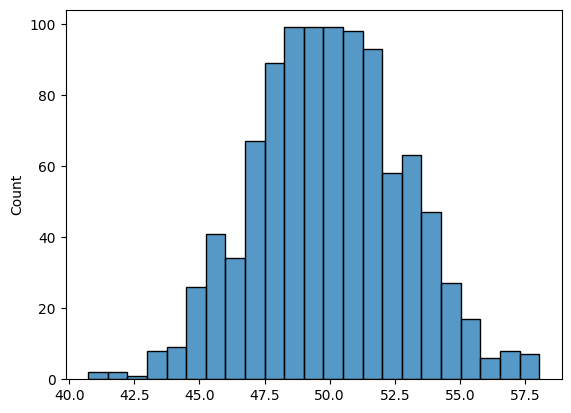

In [74]:
sns.histplot(X_means)

In [75]:
X_means = []
steps = 100000
low, high, size = 0, 100, 10000
for _ in range(steps):
  X = np.random.uniform(low=low, high=high, size=size)
  X_means.append(np.mean(X))
X_means

[np.float64(50.14160268279528),
 np.float64(49.97207320579677),
 np.float64(49.43007001613278),
 np.float64(50.599099001150854),
 np.float64(50.673768925975835),
 np.float64(49.953174776174976),
 np.float64(50.23339025265351),
 np.float64(49.94947847739123),
 np.float64(50.38342853327009),
 np.float64(49.877765325163466),
 np.float64(49.54930560932322),
 np.float64(50.41161840238179),
 np.float64(50.45865850269983),
 np.float64(49.69787821445995),
 np.float64(50.0012280233643),
 np.float64(50.02042916929493),
 np.float64(50.57336773947356),
 np.float64(50.3419017897864),
 np.float64(49.72344322903395),
 np.float64(50.02516750601373),
 np.float64(49.80504191844579),
 np.float64(49.579787945532644),
 np.float64(50.19343094193832),
 np.float64(50.05738216374455),
 np.float64(49.758754007698954),
 np.float64(49.78719643637361),
 np.float64(50.09205523773233),
 np.float64(49.982751882323335),
 np.float64(49.83054812974193),
 np.float64(49.86709009075816),
 np.float64(50.08643450897068),
 np

<Axes: ylabel='Count'>

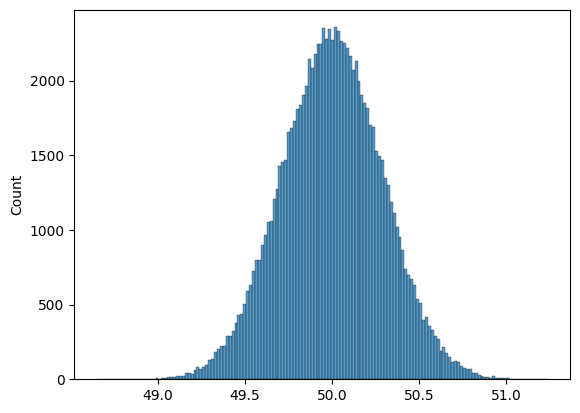

In [76]:
sns.histplot(X_means)

**Каким будет распределение выборочного среднего и почему?**

Даже несмотря на то, что рассматривалось равномерное распределение, можно увидеть, что распределение выборочных средних является нормальным. Это происходит из-за работы ЦПТ - центральной предельной теоремы. Чем больше выборок мы рассматриваем, тем ближе их среднее значение к среднему генеральной совокупности, то есть к 50. Можем увидеть этот эффект как на первом графике с меньшим количеством экспериментов, так и более явно на втором графике.

В итоге получим нормальное распределение с средним практически равным среднему генеральной совокупности E(X) = mu и стандартным отклонением SE = sigma/sqrt(n)

**Постройте распределения для выборочных СКО, медианы и 16-го персентиля.**

Распределение для выборочных СКО

In [77]:
X_stds = []
steps = 1000
low, high, size = 0, 100, 100
for _ in range(steps):
  X = np.random.uniform(low=low, high=high, size=size)
  X_stds.append(np.std(X, ddof=1))
X_stds

[np.float64(29.099169127075132),
 np.float64(29.569515887114896),
 np.float64(29.853447378419865),
 np.float64(28.61600442217707),
 np.float64(27.731649510085322),
 np.float64(30.819738866373893),
 np.float64(28.79867385541359),
 np.float64(26.93787659284829),
 np.float64(28.038592897453146),
 np.float64(28.018495683856955),
 np.float64(29.137266079437463),
 np.float64(27.767530340443898),
 np.float64(31.137365001615198),
 np.float64(30.503592976624105),
 np.float64(29.719598402146932),
 np.float64(29.188273402689784),
 np.float64(29.817678461163414),
 np.float64(29.108448482446136),
 np.float64(27.93750012769273),
 np.float64(29.202510023172714),
 np.float64(28.055245292349134),
 np.float64(29.848938330826936),
 np.float64(27.409838440212393),
 np.float64(26.06197156981165),
 np.float64(26.92545134067208),
 np.float64(28.859954709113026),
 np.float64(28.21710398539279),
 np.float64(29.571425040428267),
 np.float64(27.879556857049206),
 np.float64(29.56450227813912),
 np.float64(30.588

<Axes: ylabel='Count'>

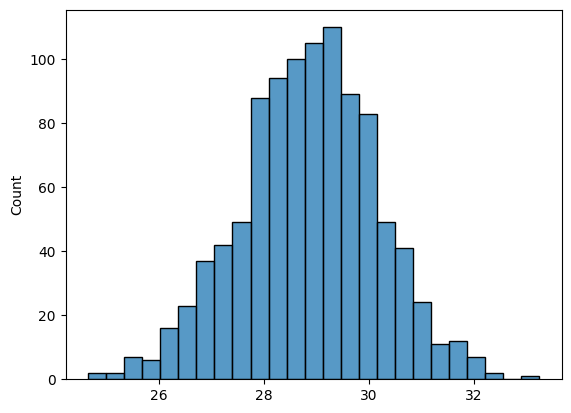

In [78]:
sns.histplot(X_stds)

In [79]:
X_stds = []
steps = 100000
low, high, size = 0, 100, 10000
for _ in range(steps):
  X = np.random.uniform(low=low, high=high, size=size)
  X_stds.append(np.std(X, ddof=1))
X_stds

[np.float64(28.99696998748046),
 np.float64(28.634591765309224),
 np.float64(29.090214456328116),
 np.float64(28.854119249943533),
 np.float64(28.993927236139793),
 np.float64(28.86208859191853),
 np.float64(29.04896822316322),
 np.float64(28.692348252260484),
 np.float64(29.07156229433981),
 np.float64(28.953824988914384),
 np.float64(28.914636938624767),
 np.float64(29.080760046572053),
 np.float64(28.88591894752101),
 np.float64(28.87663774106723),
 np.float64(28.79985696958136),
 np.float64(28.86209767195305),
 np.float64(28.84407230983521),
 np.float64(28.989959685276716),
 np.float64(28.928968569013033),
 np.float64(28.790656702116635),
 np.float64(28.930459262710585),
 np.float64(28.812586124536395),
 np.float64(28.753376802541418),
 np.float64(28.85321290961366),
 np.float64(28.89714870298759),
 np.float64(28.775817903234465),
 np.float64(28.946876232995205),
 np.float64(28.70790048107475),
 np.float64(28.89728570018301),
 np.float64(28.94707422304349),
 np.float64(28.958421223

<Axes: ylabel='Count'>

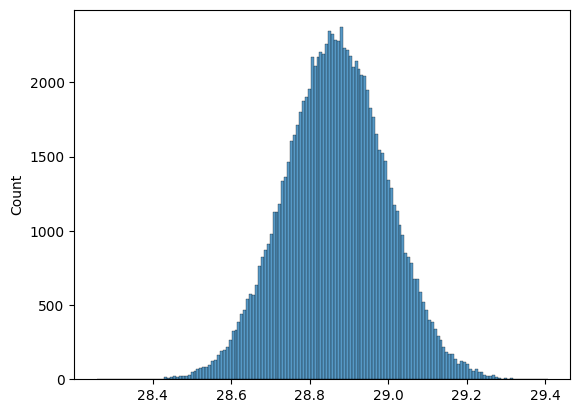

In [80]:
sns.histplot(X_stds)

Распределение для выборочных медиан

In [81]:
X_medians = []
steps = 1000
low, high, size = 0, 100, 100
for _ in range(steps):
  X = np.random.uniform(low=low, high=high, size=size)
  X_medians.append(np.median(X))
X_medians

[np.float64(45.65509840024397),
 np.float64(52.61144407729744),
 np.float64(52.02506557452844),
 np.float64(54.21483097601356),
 np.float64(48.12898457657826),
 np.float64(45.39359572098056),
 np.float64(52.46845409899426),
 np.float64(50.710105295717234),
 np.float64(57.671456773246035),
 np.float64(46.69208708835353),
 np.float64(43.38022156392967),
 np.float64(54.592473491938236),
 np.float64(47.529790262274275),
 np.float64(46.65093633967733),
 np.float64(44.22995945653159),
 np.float64(51.34484866127086),
 np.float64(57.42738783444695),
 np.float64(58.908634625105066),
 np.float64(54.55724981603417),
 np.float64(50.421754263397276),
 np.float64(55.64058255178629),
 np.float64(48.4007849311858),
 np.float64(51.23649299272465),
 np.float64(48.36346306006688),
 np.float64(54.9638178628804),
 np.float64(46.27708349840519),
 np.float64(53.14482422395159),
 np.float64(49.01506096989318),
 np.float64(48.81261632087705),
 np.float64(49.74033522902694),
 np.float64(55.55895075029001),
 np.

<Axes: ylabel='Count'>

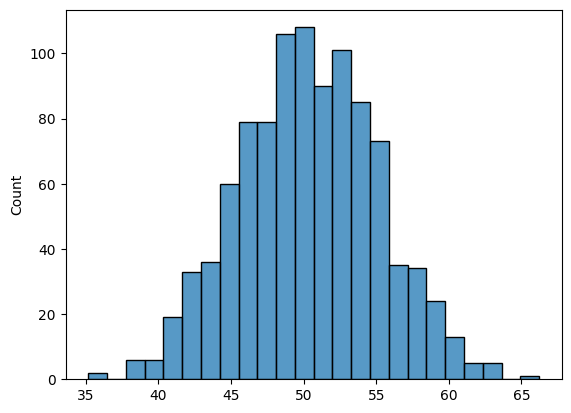

In [82]:
sns.histplot(X_medians)

In [83]:
X_medians = []
steps = 100000
low, high, size = 0, 100, 10000
for _ in range(steps):
  X = np.random.uniform(low=low, high=high, size=size)
  X_medians.append(np.median(X))
X_medians

[np.float64(49.6064853942125),
 np.float64(49.937000009529484),
 np.float64(49.45956902515242),
 np.float64(49.26859047460333),
 np.float64(49.08562496192376),
 np.float64(49.66024609040275),
 np.float64(49.57998272403876),
 np.float64(50.30617542050864),
 np.float64(50.61983971610502),
 np.float64(50.153318964256044),
 np.float64(49.86685312253477),
 np.float64(50.75177886005004),
 np.float64(50.345211706078075),
 np.float64(50.30904265225614),
 np.float64(49.64743771883831),
 np.float64(50.41270705827837),
 np.float64(49.97674715435332),
 np.float64(50.87887073517378),
 np.float64(50.143339232888465),
 np.float64(50.21278077212713),
 np.float64(49.831339504818075),
 np.float64(49.91207181410445),
 np.float64(50.145986714683616),
 np.float64(49.786722275522635),
 np.float64(50.68754928612451),
 np.float64(49.39628235974311),
 np.float64(49.21508024425202),
 np.float64(50.147661660314625),
 np.float64(49.215274452604184),
 np.float64(49.54226603879668),
 np.float64(50.57031026696889),


<Axes: ylabel='Count'>

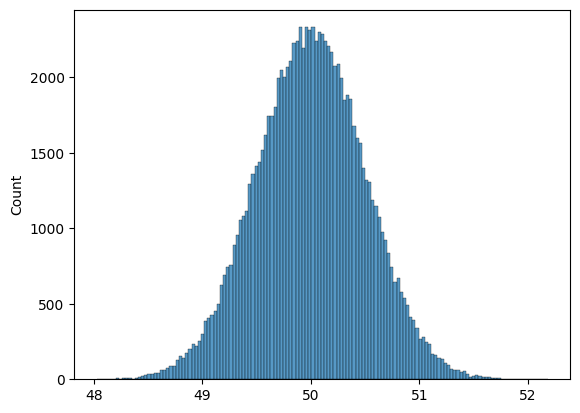

In [84]:
sns.histplot(X_medians)

Распределение для 16-го персентиля

In [85]:
X_percentiles = []
steps = 1000
low, high, size = 0, 100, 100
for _ in range(steps):
  X = np.random.uniform(low=low, high=high, size=size)
  X_percentiles.append(np.percentile(X, 16))
X_percentiles

[np.float64(21.057719949802156),
 np.float64(22.56344056404988),
 np.float64(15.031970848273431),
 np.float64(15.617253879149942),
 np.float64(24.778003254263023),
 np.float64(20.901891546205803),
 np.float64(21.50773204492086),
 np.float64(12.495225796972933),
 np.float64(18.351790074883517),
 np.float64(16.684674281563176),
 np.float64(16.167608398851286),
 np.float64(23.90218546076024),
 np.float64(13.92431312603528),
 np.float64(11.96753699300794),
 np.float64(20.990250533860223),
 np.float64(15.736721287298893),
 np.float64(13.238808838634727),
 np.float64(21.83014930981452),
 np.float64(18.631462340718407),
 np.float64(23.123712737472385),
 np.float64(20.313956077411422),
 np.float64(20.87090062720012),
 np.float64(15.41110692858205),
 np.float64(12.088357713461651),
 np.float64(15.86193327824264),
 np.float64(21.870970334563747),
 np.float64(16.60880851790962),
 np.float64(18.72963444218495),
 np.float64(13.663368348551666),
 np.float64(21.456862488620583),
 np.float64(11.887290

<Axes: ylabel='Count'>

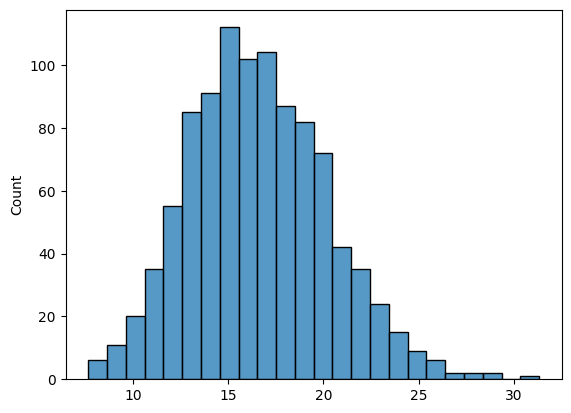

In [86]:
sns.histplot(X_percentiles)

In [87]:
X_percentiles = []
steps = 100000
low, high, size = 0, 100, 10000
for _ in range(steps):
  X = np.random.uniform(low=low, high=high, size=size)
  X_percentiles.append(np.percentile(X, 16))
X_percentiles

[np.float64(15.393423455937423),
 np.float64(15.901915629667473),
 np.float64(16.204148951557183),
 np.float64(16.00058628250963),
 np.float64(15.748495072744781),
 np.float64(15.69666130104064),
 np.float64(15.19287967861974),
 np.float64(16.4144206410447),
 np.float64(16.03409606719488),
 np.float64(15.757904406354308),
 np.float64(15.7403459355316),
 np.float64(16.783027381505246),
 np.float64(15.888930045948028),
 np.float64(16.089826763837323),
 np.float64(15.908414659945917),
 np.float64(16.219452549613898),
 np.float64(15.999237395506414),
 np.float64(16.357253194835888),
 np.float64(15.321607881876334),
 np.float64(16.159958265719947),
 np.float64(16.116828463014038),
 np.float64(16.290713331022534),
 np.float64(15.946713885414338),
 np.float64(15.71566619289744),
 np.float64(15.502050716561605),
 np.float64(15.971851897467795),
 np.float64(16.476611118004406),
 np.float64(16.305522798944974),
 np.float64(15.88110837250289),
 np.float64(15.272601623867835),
 np.float64(15.92169

<Axes: ylabel='Count'>

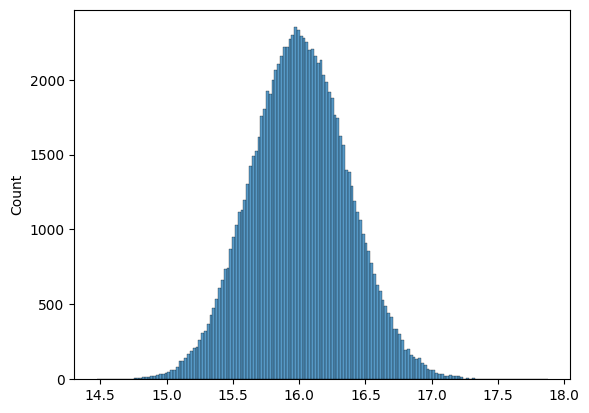

In [88]:
sns.histplot(X_percentiles)

Видим, что для распределения каждой из величин наблюдается такой же эффект работы ЦПТ, как и для среднего значения выборок. Для 16-го персентиля сначала наблюдается асимметричное распределение, затем с увеличением числа выборок, оно так же становится нормальным